<a href="https://colab.research.google.com/github/dlaek1245/hong_ee/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 128)         512       
_______________________________________________________

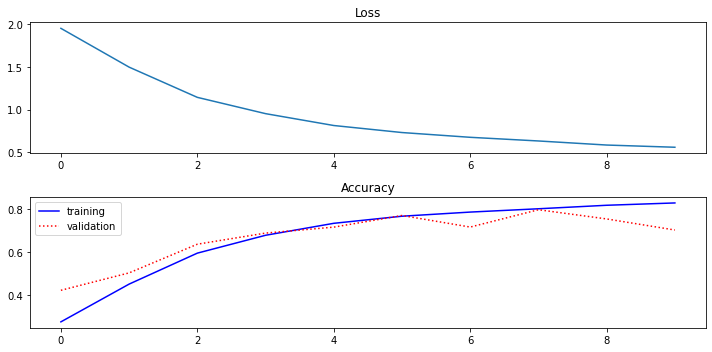

In [3]:
# ===========================
# import library
# ===========================
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
#===========================
# import mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")
#===========================
# reshape input data
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255
#===========================
# train labels
#===========================
train_labels = to_categorical(train_labels) #one-hot encoding
test_labels = to_categorical(test_labels) #one-hot encoding
#===========================
# model creation by sequential class
#===========================
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3,),activation='relu', input_shape=(28,28,1), padding='same',kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(layers.Conv2D(128,(3,3,),activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(layers.Conv2D(128,(3,3,),activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(layers.Conv2D(128,(3,3,),activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(layers.Dense(10,activation='softmax', kernel_initializer='he_normal'))
print(model.summary())
#-------
# generator
#-------
gen = ImageDataGenerator(rotation_range=180 , vertical_flip=True , horizontal_flip= True , zoom_range= [0.5 , 3.0])
Gener = ImageDataGenerator()
GenerTrain = gen.flow(train_images,train_labels,batch_size=65)
GenerTest = Gener.flow(test_images,test_labels,batch_size=65)
#===========================
# Tensorboard usage
#===========================
tensorboard = keras.callbacks.TensorBoard(log_dir="E:\\tensorflow\log")
#===========================
# model compile and training
#===========================
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
GenerModel = model.fit(GenerTrain, steps_per_epoch= 60000/65 , epochs= 10 , validation_data= GenerTest ,
                       validation_steps= 10000 / 65)
#-------
#----evlauadte----
#-------
#loss, acc = model.evaluate(test_images,test_labels)
evaluate = model.evaluate_generator(GenerTest , steps= 5)
#print('acc : ', acc); print('loss : ', loss);
print("%s: %.2f%%" %(model.metrics_names[1], evaluate[1]*100))

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.title("Loss")
plt.plot(GenerModel.history['loss'])


plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.plot(GenerModel.history['accuracy'], 'b-', label="training")
plt.plot(GenerModel.history['val_accuracy'], 'r:', label="validation")

plt.legend()
plt.tight_layout()
plt.show()

#plt.plot(acc)


model.save('mnist.h5')


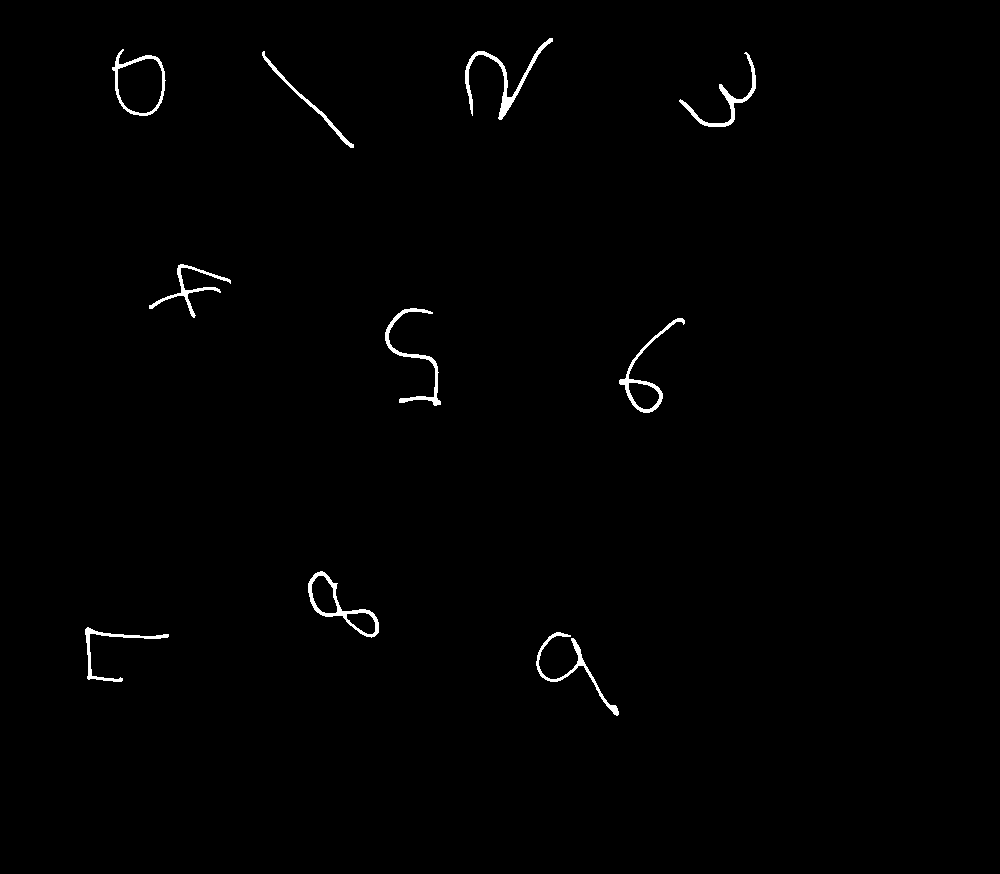

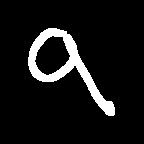

9


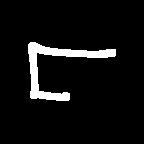

7


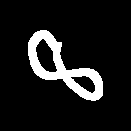

8


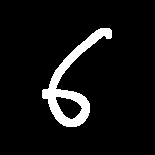

2


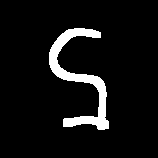

5


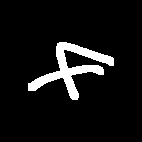

4


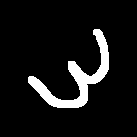

3


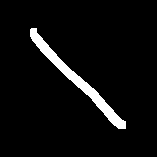

1


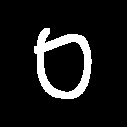

5


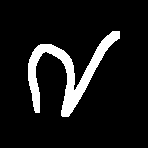

2


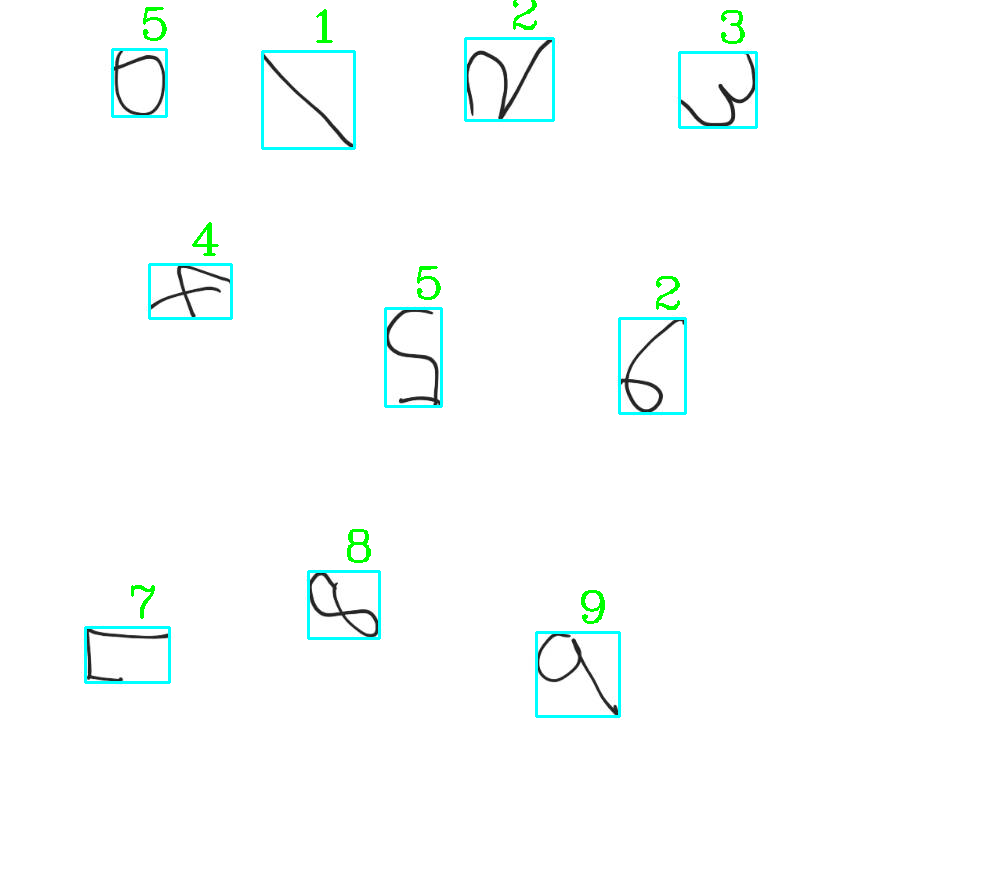

-1

In [6]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

imm = cv.imread('/content/rotnum.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(imm, cv.COLOR_BGR2GRAY)

ret, binary = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
binary = cv.morphologyEx(binary, cv.MORPH_CLOSE, kernel)

cv2_imshow(binary)
cv.waitKey(0)

contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL,
                                      cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    len = max(w, h) + 60
    dig = np.zeros((len, len, 1), np.uint8)

    x2, y2 = x - (len - w) // 2, y - (len - h) // 2

    dig = binary[y2:y2 + len, x2:x2 + len]

    kernel = np.ones((5, 5), np.uint8)
    dig = cv.morphologyEx(dig, cv.MORPH_DILATE, kernel)

    cv2_imshow(dig)
    cv.waitKey(0)

    model = load_model('mnist.h5')

    dig = cv.resize(dig, (28, 28), interpolation=cv.INTER_AREA)

    dig = dig / 255.0

    img_input = dig.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)

    number = np.argmax(predictions)
    print(number)

    cv.rectangle(imm, (x, y), (x + w, y + h), (255, 255, 0), 2)

    location = (x + int(w * 0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX
    fontScale = 1.5
    cv.putText(imm, str(number), location, font, fontScale, (0, 255, 0), 2)

    cv2_imshow(dig)
    cv.waitKey(0)

cv2_imshow(imm)
cv.waitKey(0)
